<P ALIGN=LEFT Font-size="20">
    
    
Spotify is a Swedish audio streaming and media services provider , launched in October 2008. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.Spotify works on freemium business model and generates revenues by selling premium streaming subscriptions to users and advertising placements to third parties.

Through this project we will use the data available to us(from :https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) and try to anlayze the current trend and predict popularity of songs by various categories like artists , genres etc. 

Using various libraries of Python like pandas , matplotlib , numpy we will read the given data, visualize, plot, predict the popularity ratings of the songs and their trends. Further, to predict the popularity of the songs, we will be Importing Sklearn libraries for Data Modelling & Normalisation and Liner_Model, Lasso, XGBRegressor, KNN for ML models to predict the popularity of songs. We are also importing the randint library to generate random numbers. 

    
<font color ="red"> <b>Note: As we are handling a large dataset with more than 150K records, the code will take more than an hour to run. <br> All libraries used in this notebook are required to generate the output </b> </font>
</P>

# Importing essential libraries

In [11]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn imports 
# For preprocessing and feature extraction

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer


# Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor

# Model selection and fine tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# XGBoost import
from xgboost import XGBRegressor

# Utils (to generate random numbers)
from scipy.stats import uniform, randint


# We will now read the data using pandas read_csv function 

In [9]:
df_data = pd.read_csv('archive/data.csv')
df_data_by_artist = pd.read_csv('archive/data_by_artist.csv')
df_data_by_genres = pd.read_csv('archive/data_by_genres.csv')
df_data_by_year = pd.read_csv('archive/data_by_year.csv')
df_data_w_genres = pd.read_csv('archive/data_w_genres.csv')

# We will now begin our anlaysis by visualizing the imported data 

In [6]:
# Read the info of given data 

df_data.info()
df_data_by_artist.info()
df_data_by_genres.info()
df_data_by_year.info()
df_data_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

<table style="border-collapse: collapse; width: 100%; height: 1044px;" border="1">
<tbody>
<tr style="height: 18px; text-align: left;">
<td style="width: 20%; height: 18px; text-align: left;"><strong>Column Name</strong></td>
<td style="width: 80%; height: 18px;text-align: left;"><strong>Description</strong></td>
</tr>
<tr style="height: 90px; text-align: left;">
<td style="width: 50%; height: 90px; text-align: left;" width="154">Valence</td>
<td style="width: 50%; height: 90px; text-align: left;" width="1322">The Positiveness Of The Track. Higher Values Mean, The Track Evokes Positive Emotions (Like Joy) Otherwise Means, It Evokes Negative Emotions (Like Anger, Fear). Ranges Between 0-1.</td>
</tr>
<tr style="height: 18px; text-align: left;">
<td style="width: 50%; height: 18px; text-align: left;" width="154">Year</td>
<td style="width: 50%; height: 18px; text-align: left;" width="1322">The Release Year Of The Track.</td>
</tr>
<tr style="height: 72px; text-align: left;">
<td style="width: 50%; height: 72px; text-align: left;" width="154">Acousticness</td>
<td style="width: 50%; height: 72px; text-align: left;" width="1322">The Value That Describes How Acoustic A Song Is. Higher Values Mean That The Song Is Most Likely To Be An Acoustic One. Ranges Between 0-1.</td>
</tr>
<tr style="height: 36px; text-align: left;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Artists</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The List Of Artists Credited For The Production Of The Track.</td>
</tr>
<tr style="height: 54px; text-align: left;">
<td style="width: 50%; height: 54px; text-align: left;" width="154">Danceability</td>
<td style="width: 50%; height: 54px; text-align: left;" width="1322">The Relative Measurement Of The Track Being Danceable. Higher Values Mean That The Song Is More Danceable. Ranges Between 0-1.</td>
</tr>
<tr style="height: 18px; text-align: left;">
<td style="width: 50%; height: 18px; text-align: left;" width="154">Duration</td>
<td style="width: 50%; height: 18px; text-align: left;" width="1322">The Length Of The Track. In Milliseconds.</td>
</tr>
<tr style="height: 54px; text-align: left;">
<td style="width: 50%; height: 54px; text-align: left;" width="154">Energy</td>
<td style="width: 50%; height: 54px; text-align: left;" width="1322">The Energy Value Of The Track. Higher Values Mean That The Song Is More Energetic. Ranges Between 0-1.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Explicit</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The Binary Value Whether The Track Contains Explicit Content Or Not.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Id</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The Primary Identifier For The Track, Generated By Spotify</td>
</tr>
<tr style="height: 72px;">
<td style="width: 50%; height: 72px; text-align: left;" width="154">Instrumentalness</td>
<td style="width: 50%; height: 72px; text-align: left;" width="1322">The Relative Ratio Of The Track Being Instrumental. Higher Values Mean That The Song Contains More Instrumental Sounds. Ranges Between 0-1.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Key</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">All Keys On Octave Encoded As Values Ranging From 0 To 11, Starting On C As 0, C# As 1, Etc.</td>
</tr>
<tr style="height: 108px;">
<td style="width: 50%; height: 108px; text-align: left;" width="154">Liveness</td>
<td style="width: 50%; height: 108px; text-align: left;" width="1322">Detects The Presence Of An Audience In The Recording. Higher Values Represent An Increased Probability That The Track Was Performed Live. A Value Above 0.8 Provides A Strong Likelihood That The Track Is Live. Ranges Between 0-1.</td>
</tr>
<tr style="height: 144px;">
<td style="width: 50%; height: 144px; text-align: left;" width="154">Loudness</td>
<td style="width: 50%; height: 144px; text-align: left;" width="1322">The Overall Loudness Of A Track In Decibels (Db). Loudness Values Are Averaged Across The Entire Track And Are Useful For Comparing The Relative Loudness Of Tracks. Loudness Is The Quality Of A Sound That Is The Primary Psychological Correlate Of Physical Strength (Amplitude). Values Typical Range Between -60 And 0 Db.</td>
</tr>
<tr style="height: 72px;">
<td style="width: 50%; height: 72px; text-align: left;" width="154">Mode</td>
<td style="width: 50%; height: 72px; text-align: left;" width="1322">Mode Indicates The Modality (Major Or Minor) Of A Track, The Type Of Scale From Which Its Melodic Content Is Derived. Major Is Represented By 1 And Minor Is 0.</td>
</tr>
<tr style="height: 18px;">
<td style="width: 50%; height: 18px; text-align: left;" width="154">Name</td>
<td style="width: 50%; height: 18px; text-align: left;" width="1322">The Name Of The Song.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Popularity</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The Popularity Of The Song. Ranges Between 0 And 100.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Release Date</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The Date Of Release Of The Track In Yyyy-Mm-Dd, Yyyy-Mm, Or Even Yyyy Format</td>
</tr>
<tr style="height: 54px;">
<td style="width: 50%; height: 54px; text-align: left;" width="154">Speechiness</td>
<td style="width: 50%; height: 54px; text-align: left;" width="1322">The Relative Length Of The Track Containing Any Kind Of Human Voice. Ranged Between 0-1.</td>
</tr>
<tr style="height: 36px;">
<td style="width: 50%; height: 36px; text-align: left;" width="154">Tempo</td>
<td style="width: 50%; height: 36px; text-align: left;" width="1322">The Tempo Of The Track In Beat Per Minute (Bpm)</td>
</tr>
</tbody>
</table>

To analyze the data on the basis of various categories(characteristics), we will use <b>two very popular libraries of python</b> : 

<b>matplotlib:</b> comprehensive library for creating static, animated, and interactive visualizations in Python <br>
<b>seaborn:</b> Data visualization library based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics.

<b>Our goal </b>is to analyze the data and determine the trend on the basis of various characteristics of songs such as genres , artists , popularity rating , audio characteristics.

# Top 10  Popular Artists from 1921-2021

We now proceed to analyze the data and find the top 10 artists based on their popularity ratings.
We will plot a bar chart for the same using <b>matplotlib.pyplot.bar function</b>



Text(0, 0.5, 'Popularity')

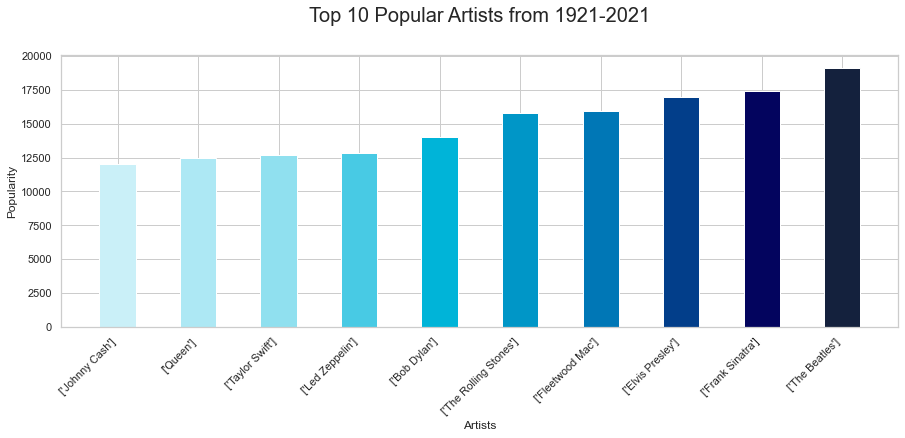

In [7]:

arpop = pd.DataFrame(df_data.groupby('artists')['popularity'].sum()).sort_values('popularity').tail(10).reset_index()
fig = plt.figure(figsize=(15,5))
plt.bar( arpop['artists'],
         arpop['popularity'],
         width=0.45,
         color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Popular Artists from 1921-2021',y=1.1,fontsize=20)
plt.xlabel('Artists')
plt.ylabel('Popularity')


<b> From the above bar chart , we observe that the artists from 60s - 70s like Beatles , Elvis Presley , Frank Sinatra continue to rule the popularty charts .</b>

# Top 10 Genres in Spotify

We will now create a pie chart to segment top genres in given data . <br> To do so , we will use <b>matplotlib.pyplot.figure(kind = "pie")</b>






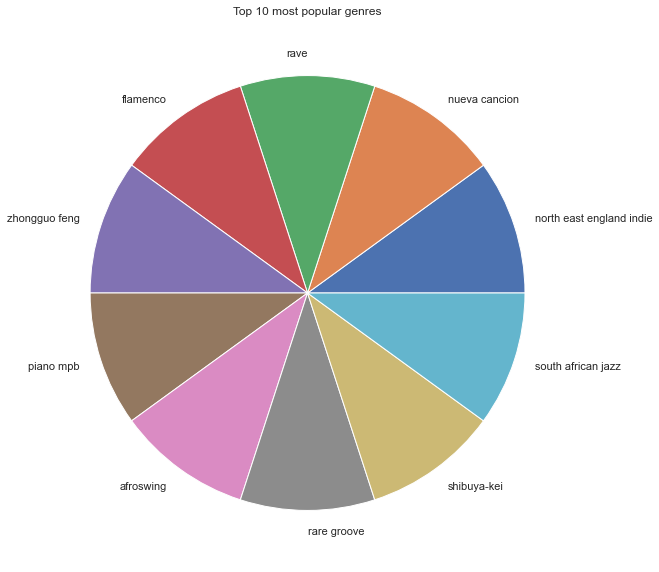

In [8]:
genre_values = df_data_by_genres["genres"]
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
genre_values.value_counts()[:10].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 10 most popular genres")
plt.show()

# Top 10 popular tracks

C:\Users\esha2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White Christmas'),
  Text(1, 0, 'Winter Wonderland'),
  Text(2, 0, 'Silent Night'),
  Text(3, 0, 'Jingle Bells'),
  Text(4, 0, 'Sleigh Ride'),
  Text(5, 0, 'Silver Bells'),
  Text(6, 0, 'The Christmas Song'),
  Text(7, 0, 'Summertime'),
  Text(8, 0, 'Stay'),
  Text(9, 0, 'O Holy Night')])

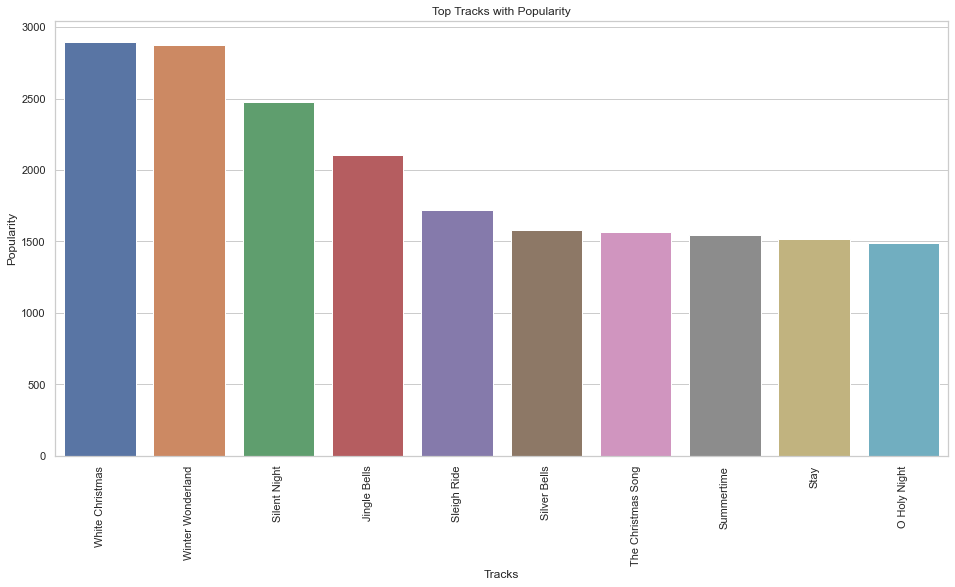

In [10]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df_data.groupby("name")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)

<b>From above bar graph , we observe that the most popular tracks are usually holiday songs like  <br> White Christmas, WInter Wonderland , Silent Night </b>


# Count of Tracks added over the years

We continue to analyze the data and see the number of songs grouped by years in our spotify database.<br>
We will use<b> seaborn.lineplot </b> for the same 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year')

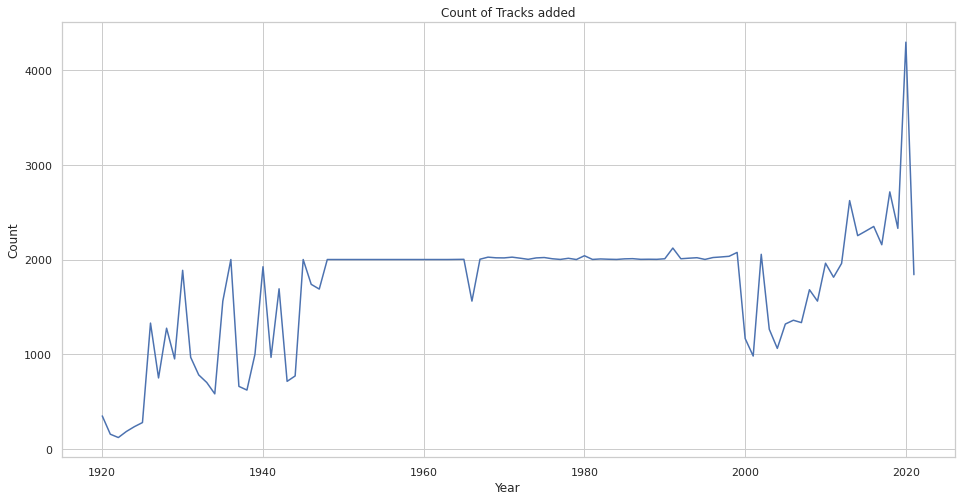

In [26]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df_data.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')


<b>We observe the following from the above graph:
* the earliest song in the database is from 1920s
* number of songs in the database from 1950 - 2000 remain constant
* number of songs keep on increasing in the later year </b>


# Audio characteristics over years

Studying the trend of various audio characteristics over years gives us the following insights -
* The acousticness of the songs have been decreasing with time
* The energy of songs have been on constant rise thoughout the year
* It can be seen songs in 1920-1940 were heavy on words, as we see the trend in speechiness. Post 1960, this has remain some what constant
* Liveness of the songs has remained constant throughout the years
* Danceability has also been constant throughout the years

Text(0.5, 0, 'Year')

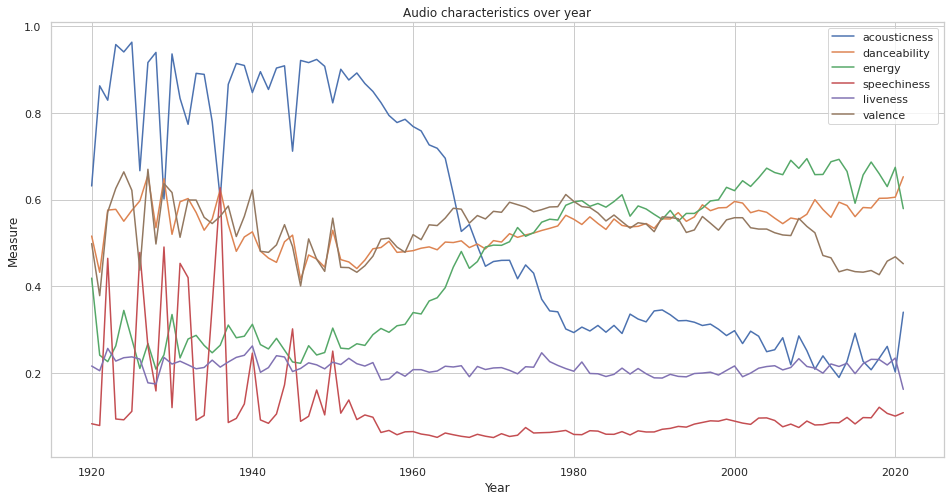

In [27]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

# Popularity of Genres with respect to the various features

<Figure size 1152x576 with 0 Axes>

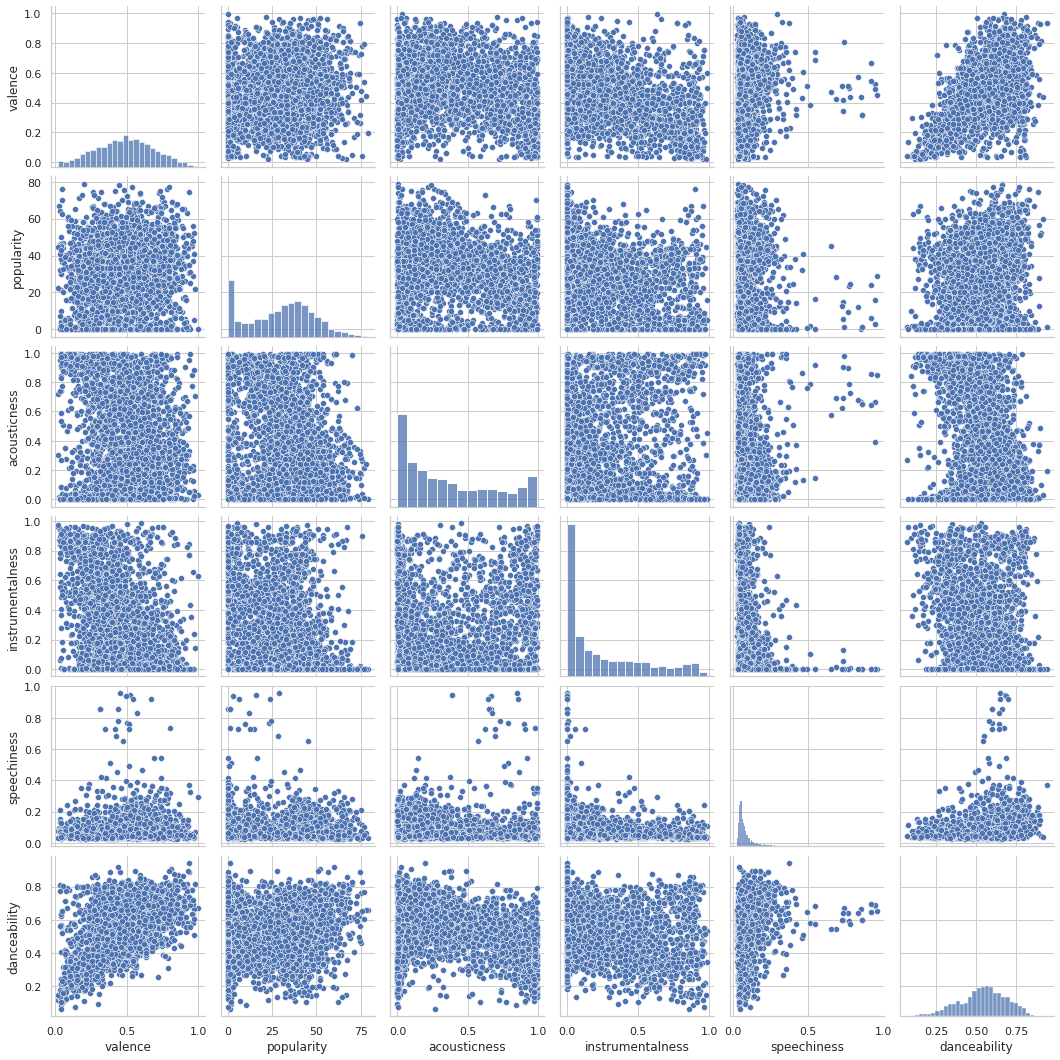

In [28]:
# Popularity of Genres with respect to the various features
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df_data_by_genres[cols], height = 2.5 )
plt.show();

 <b>On the basis of above matrix plot , we observe :<br>

* Valence and Danceability are highly related 
* Danceability and Speechiness are also highly related
* Songs with low speechiness usually have high valence (Positiveness of the track ) </b>

# Predicting popularity of the songs 

After analysing the data and doing the basic EDA, we'll move on the prediction part. Our next objective is to predict the popularity of the songs with the help of four different models i.e Linear model, Lasso, XGBRegressor and KNN.

First we'll do the Data cleaning and the construct the model. After comparing the results from the model, we'll fine-tune it to improve the resuts. 

# 1 Data Cleaning 

We'll first read the data using pandas read_csv() function

In [12]:
# Taking the spotify dataset in input_data dataframe
input_data = pd.read_csv('archive/data.csv')
input_data.head()
input_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

We feel that `release_date` will not have much more added value than the year songs were released. We will thus drop this column. We have to find out whether there may be duplicates in the dataset in order to understand if we can only keep the name as a primary key. 

**We thus define a duplicate as several songs appearing in the dataset, for which the song title and the artist are strictly identical.** 

In order to identify these possible duplicates, we create the `artist+name` column.

In [13]:
input_data['artists+name'] = input_data.apply(lambda row: row['artists'] + row['name'], axis=1)
df = input_data[input_data['artists+name'].duplicated()]
df.tail(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artists+name
174379,0.79500,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,['Alessia Cara']A Little More
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.826,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.231,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020,"['Stephan F', 'YA-YA']Only Tonight - Radio Edit"
174381,0.79500,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,['Alessia Cara']A Little More
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.407,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.253,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020,"['BigBankCarti', 'Keyvo400']LayUp"
174383,0.79500,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,['Alessia Cara']A Little More
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020,"['DJ Combo', 'Sander-7', 'Tony T']The One"
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,['Alessia Cara']A Little More
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020,['Roger Fly']Together
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,['Taylor Swift']champagne problems
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.891000,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020,['Roger Fly']Improvisations


There are thus 14,948 duplicates. Let us look at one of the examples.

In [14]:
input_data[input_data['name']=='champagne problems']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artists+name
19922,0.920,['Taylor Swift'],0.462,244000,0.240,1,0sY6ZUTh4yoctD8VIXz339,0.0,0,0.113,-12.077,1,champagne problems,85,2020-12-11,0.0377,171.319,0.320,2020,['Taylor Swift']champagne problems
20128,0.921,['Taylor Swift'],0.462,244000,0.242,1,2EliNOReCRCe1ynR6G8yeT,0.0,0,0.113,-12.077,1,champagne problems,54,2021-01-21,0.0376,171.352,0.320,2021,['Taylor Swift']champagne problems
158571,0.920,['Taylor Swift'],0.463,244000,0.248,0,6rap8NpGq8LDcVaJWkKFPn,0.0,0,0.113,-12.036,1,champagne problems,70,2020-12-10,0.0374,171.346,0.325,2020,['Taylor Swift']champagne problems
174387,0.920,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.0,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,['Taylor Swift']champagne problems


These four lines obviously represent the same song ("Champagne problems" by Taylor Swift, issued around the end of 2020), but they have very different popularity ratings: the latter vary from 54 to 85! This is a problem and we'll try to resolve this before moving forward. 


Info on popularity score

So the popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm. The algorithm is based mostly on the total number of plays the track has had and how recently those plays were.

In-general, songs that are being played a lot recently will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

According to this info, a solution would be to replace the popularity for duplicates by the maximum of the popularity ratings. Indeed, popularity is a "positive" metric: the only thing that can make a song's popularity decrease is if it is not played at all for a while. Thus, if a song has three perfectly identical duplicates but one has a higher popularity score, it means it has been played more and, in particular, it has been played more recently. Thus, this score is more relevant than the two other to monitor this song's popularity.

In [15]:
# We gather the list of indices corresponding to the maximum popularity for each duplicated artist/song pair.
indexes = []

for name in df['artists+name'].unique():
    subset = input_data[input_data['artists+name'] == name].copy()
    m = subset['popularity'].max()
    index = subset[subset['popularity'] == m].index[0]
    indexes.append(index)
    
inputdata_bis = input_data.loc[indexes].copy()
inputdata_bis['artists+name'].duplicated().sum()

0

In [16]:
len(inputdata_bis)

12251

In [17]:
len(input_data['artists+name'].unique())

159441

In [18]:
inputdata_ter = input_data.copy()
for i, row in input_data.iterrows():
    if row['artists+name'] in df['artists+name'].unique():
        inputdata_ter.drop(index=i, inplace=True)
        
in_frame = [inputdata_bis, inputdata_ter]
inputdata_four = pd.concat(in_frame)

inputdata_four['artists+name'].duplicated().sum()

0

In [19]:
inputdata_ter.shape

(147190, 20)

We can check that:
12251+147190=159441 

Here, the latter corresponds to the number of entries in the initial dataset. We have thus removied the duplicates. Now that each song is unique, we will remove the id which is unnecessary. We also do not need artist+name anymore, as it was only meant to look for duplicates.

In [29]:
inputdata_four.drop(columns=['release_date','id','artists+name'], inplace=True)

Another area of concern is that some songs have a null tempo. It does not make any sense to have tempo=0. If we print the corresponding data subset, we can see that tempo is not the only null metric for these songs: danceability, speechiness, valence are also equal to 0.

This is the case for approximately 100 songs, we will thus drop such songs.

In [30]:
inputdata_four = inputdata_four[inputdata_four['tempo'] != 0].copy()
inputdata_four.reset_index(inplace=True, drop=True)


In [ ]:
inputdata_four.to_csv('./songs.csv', index=False)

# 2. EDA and data visualisation

Now that we have cleaned the data and removed the duplicate entries, we'll do further EDA and visulization from the popularity prediction standpoint. We figured that plotting several metrics compared to popularity could give us a first insight of relevant features to predict popularity.

In [31]:
in_song=pd.read_csv('./songs.csv')

In [32]:
in_song.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,159328.000000,159328.000000,1.593280e+05,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000,159328.000000
mean,0.503522,0.535910,2.320505e+05,0.479709,0.070521,0.195647,5.206053,0.212535,-11.811565,0.702544,26.076804,0.109250,116.992793,0.524748,1976.482495
std,0.379451,0.175438,1.486368e+05,0.272072,0.256024,0.333123,3.519863,0.181340,5.678554,0.457140,22.002049,0.188851,30.189656,0.264069,26.705342
min,0.000000,0.055100,1.530700e+04,0.000020,0.000000,0.000000,0.000000,0.009670,-55.000000,0.000000,0.000000,0.022200,30.946000,0.000000,1920.000000
25%,0.091400,0.413000,1.654228e+05,0.246000,0.000000,0.000000,2.000000,0.099700,-14.991000,0.000000,1.000000,0.035300,93.750000,0.311000,1955.000000
50%,0.528000,0.547000,2.050000e+05,0.460000,0.000000,0.000515,5.000000,0.139000,-10.903000,1.000000,26.000000,0.045700,115.739500,0.536000,1977.000000
75%,0.897000,0.668000,2.649470e+05,0.706000,0.000000,0.245000,8.000000,0.273000,-7.559000,1.000000,43.000000,0.077600,135.019000,0.743000,1998.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


Here, we can see that 'popularity' metric has values that range from 0 to 100. 25% of the songs are 1/100 popular or less, whereas only 25% of the songs achieve more than 43/100 popularity.

Since we know that, for an equal number of plays, Spotify gives a higher popularity score to tracks that have been played recently than to those that have been played earlier, we would plot popularity according to time to get further insights.  


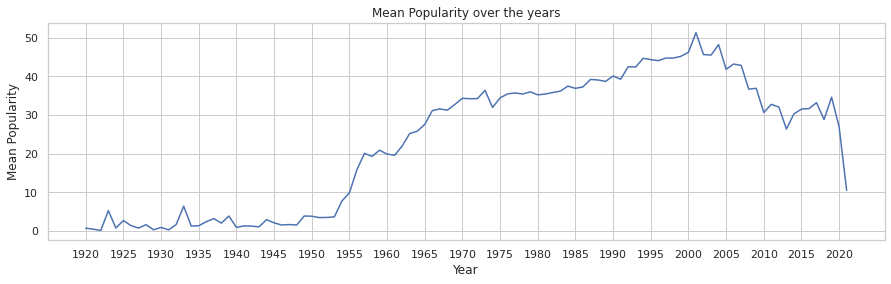

In [33]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = in_song.groupby('year')['popularity'].mean().plot()
ax.set_title('Mean Popularity over the years')
ax.set_ylabel('Mean Popularity')
ax.set_xlabel('Year')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

We have learned that the popularity 'lags' by a few days/weeks. Hence, we are seeing a drop around the year 2021. The rest of the trend is interesting, as popularity rises until the year 2000 and then falls. 


### **Acousticness**

The 'acousticness' ranges from 0 to 1. Acousticness of the majority of tracks is either close to 0 or 1.

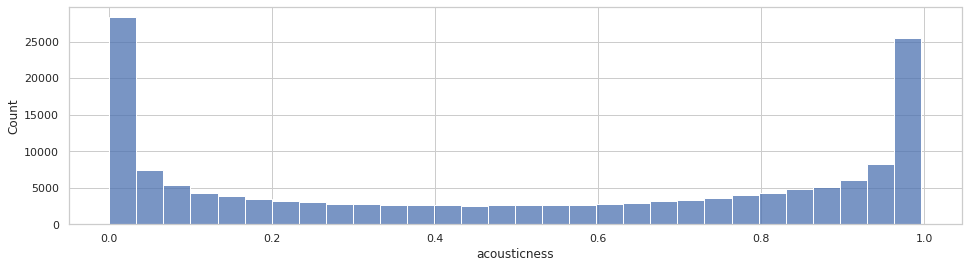

In [34]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(in_song['acousticness'],  bins=30)
plt.show()

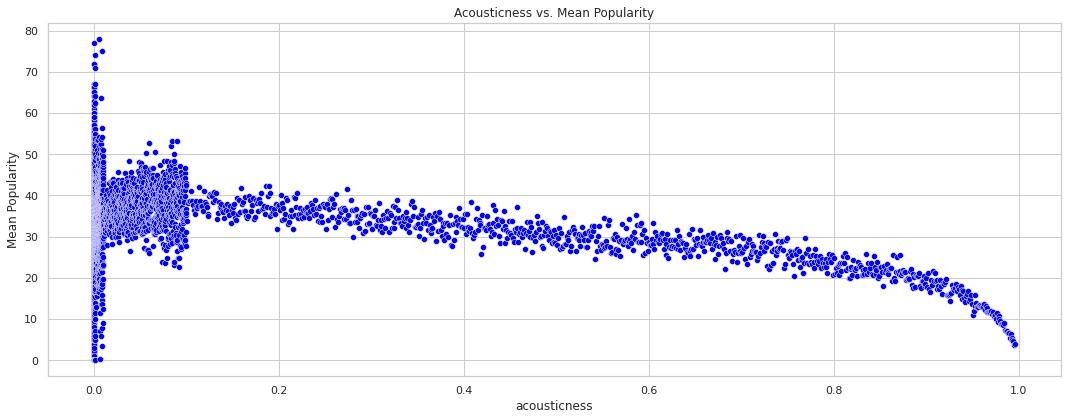

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
ax1_data =  in_song.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x=ax1_data['acousticness'], y=ax1_data['popularity'], color='blue', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### **Danceability**

The 'danceability' ranges from 0 to 1. Danceability seems normally distributed.

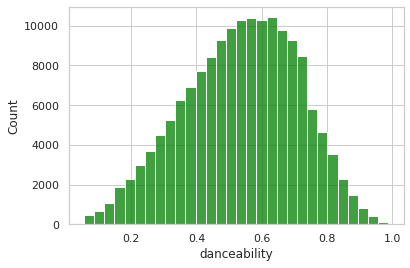

In [36]:
sns.histplot(in_song['danceability'], color='green', bins=30)
plt.show()

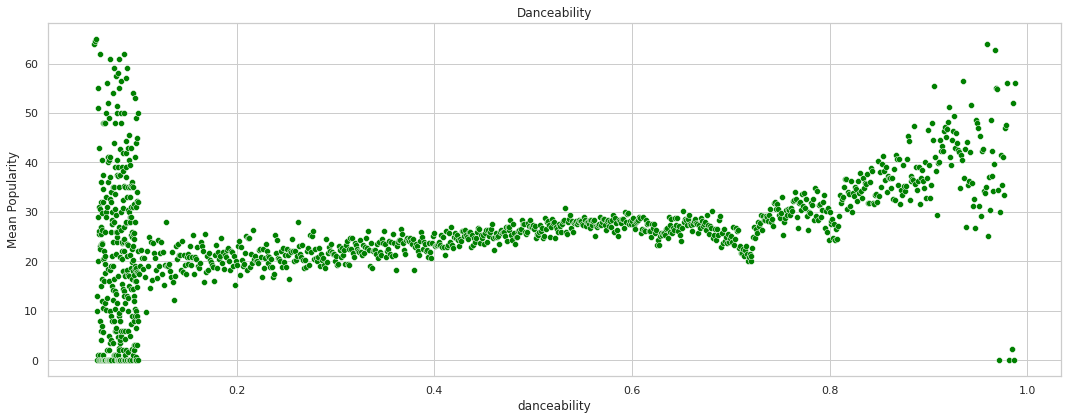

In [37]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  in_song.groupby('danceability')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='danceability', y='popularity', data=ax_data, color='green', ax=ax)
ax.set_title('Danceability')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### **Duration_ms**

Tracks last from 5 seconds to 90 minutes.

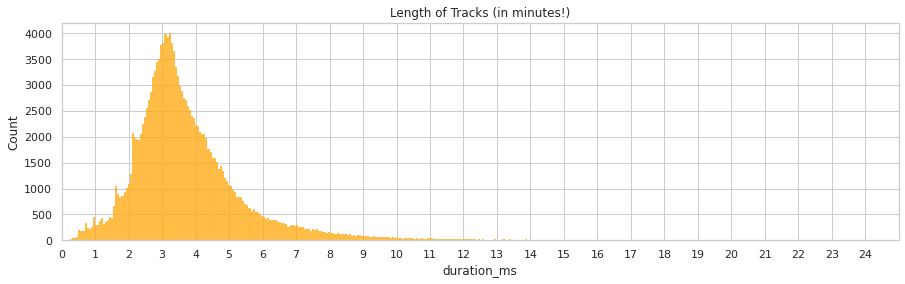

In [38]:
fig, ax = plt.subplots(figsize = (15, 4))
ax = sns.histplot(in_song['duration_ms']/60000, color='orange')
ax.set_title('Length of Tracks (in minutes!)')
ax.set_xticks(range(0,25,1))
ax.set_xlim(0,25)
plt.show()

### **Energy**

'Energy' measures the intensity and activity: energetic tracks feel faster and louder.

Intuitively, we could suspect 'energy' and 'danceability' or 'energy' and 'loudness' would be similar. 

We'll check this by using Pearson's correlation coefficient. 
This correlation coefficient ranges from −1 to 1: a value of 1 implies that a linear equation describes the relationship between X and Y perfectly; a value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables.

In [39]:
a = in_song['energy'].corr(in_song['danceability']).round(3)
print(f'The Pearson correlation coefficient is: {a:^10}')

The Pearson correlation coefficient is:   0.195   


In [40]:
a = in_song['energy'].corr(in_song['loudness']).round(3)
print(f'The Pearson correlation coefficient is: {a:^10}')

The Pearson correlation coefficient is:   0.777   


As 'energy' and 'loudness' are strongly correlated, we will drop one of the two. Given how the two plots "Popularity vs. energy" and "Popularity vs. loudness" (not shown here) look, we will keep energy and discard loudness.

In [41]:
in_song.drop(columns=['loudness'], inplace=True)

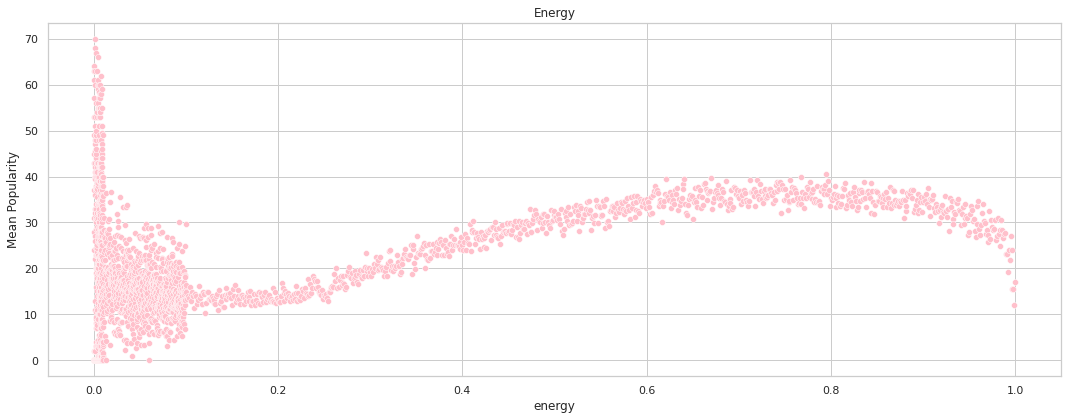

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  in_song.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='energy', y='popularity', data=ax_data, color='pink', ax=ax)
ax.set_title('Energy')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### **Instrumentalness**

The `instrumentalness` being close to 1 means there are no vocals.

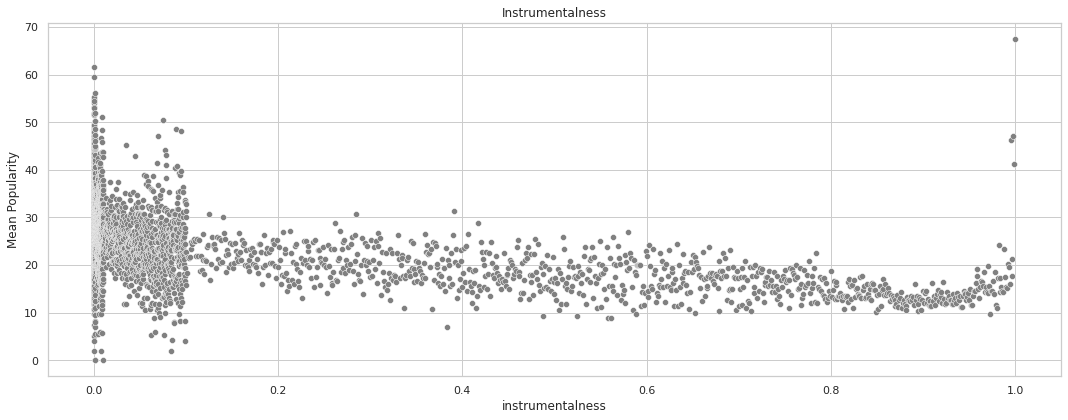

In [43]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  in_song.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='instrumentalness', y='popularity', data=ax_data, color='grey', ax=ax)
ax.set_title('Instrumentalness')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### **Liveness**

'liveness' detects the presence of an audience. High liveness suggests the track was live.

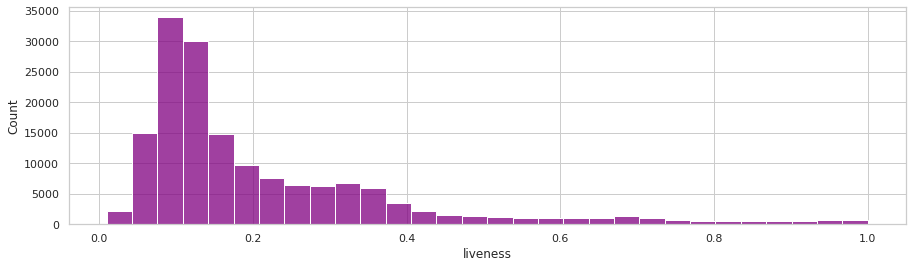

In [44]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.histplot(in_song['liveness'], color='purple', bins=30)
plt.show()

### **Speechiness**
When studying `speechiness`, we can see that songs that are too "speechy" are less popular. We will thus create a binary variable: "Speech over 0.57".

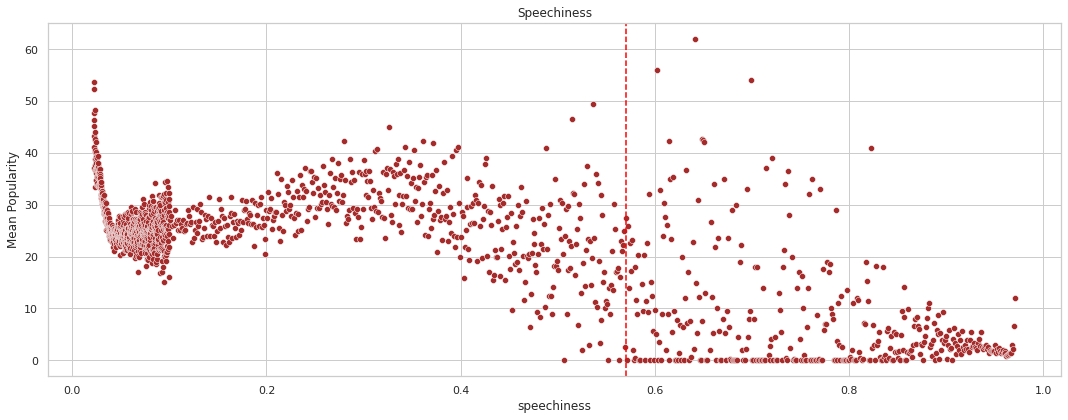

In [45]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  in_song.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='speechiness', y='popularity', data=ax_data, color='brown', ax=ax)
ax.axvline(x=0.57, ymin=0, ymax=1, color='red', linestyle='dashed')
ax.set_title('Speechiness')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

In [46]:
in_song['speech_over.57']=1*(in_song['speechiness']>=0.57)
in_song.drop(columns='speechiness',inplace=True)

# Model Construction

## Splitting the data

First, we need to split the data into two parts- training dataset and testing dataset. 

If we consider the usecase of Spotify, the company certainly wants to predict the popularity of future songs. Thus, we should split the dataset between songs issued before a certain year and songs issued after it.

We will make a train set of all the songs previous to 1996, a validation set composed of the songs issued between 1996 and 2014 to fine-tune and select our models (18% of the whole dataset), and a test set composed of the songs issued on and after 2014 (10% of the total dataset).

In [47]:
X_arr = in_song.sort_values(by='year').drop(columns=['popularity']).copy()
Y_arr = in_song.sort_values(by='year')['popularity'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_arr, test_size=0.1, shuffle=False)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=False)

In [48]:
X_train.tail(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,name,tempo,valence,year,speech_over.57
54564,0.03020,['Crucial Conflict'],0.749,260240,0.733,1,0.000000,11,0.151,0,Hay,139.935,0.897,1996,0
54565,0.00751,['Nada Surf'],0.444,220587,0.884,0,0.000089,7,0.116,1,Popular,94.820,0.296,1996,0
54566,0.01530,['Rakim'],0.796,250907,0.798,0,0.000000,6,0.106,0,Guess Who's Back,94.016,0.692,1996,0
54567,0.06240,['Nas'],0.789,288267,0.449,1,0.000000,11,0.131,0,Take It In Blood,91.777,0.301,1996,0
54568,0.01020,['Descendents'],0.391,135133,0.968,0,0.000070,0,0.446,1,I'm The One,90.481,0.647,1996,0


# Model explorations

### Basic preprocessing - First iterations

We use ColumnTransformer to do various preprocessing tasks simultaneously: scaling the year, tempo and duration (contrarily to the others, these features are not on a 0-1 scale), one-hot encoding the key as it is a categorical variable ranging from 1 to 11 (more on the music key here): this will create 10 columns taking 0/1 values.

We will use the artists and the songs title later on, for now we drop the columns.

In [49]:
ct_arr = ColumnTransformer([('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_ms']),
                        ('categorical', OneHotEncoder(), ['key']),
                        ('drop_cols', 'drop', ['artists', 'name'])],
                       remainder='passthrough')

ct_arr.fit(X_train)

X_train_preprocessed = ct_arr.transform(X_train)
X_val_preprocessed = ct_arr.transform(X_val)
X_test_preprocessed = ct_arr.transform(X_test)

Now we are ready to explore various models

In [51]:
X_train_preprocessed

array([[0.        , 0.21918884, 0.05540184, ..., 0.        , 0.559     ,
        0.        ],
       [0.        , 0.24203876, 0.05419513, ..., 1.        , 0.451     ,
        0.        ],
       [0.        , 0.16876097, 0.04704341, ..., 0.        , 0.503     ,
        0.        ],
       ...,
       [1.        , 0.29671483, 0.06480552, ..., 0.        , 0.692     ,
        0.        ],
       [1.        , 0.28618138, 0.07508198, ..., 0.        , 0.301     ,
        0.        ],
       [1.        , 0.28008431, 0.03296004, ..., 1.        , 0.647     ,
        0.        ]])

In [52]:
# Usual linear regression

## We instantiate the model
linearreg_arr = LinearRegression()

# We then fit the model on preprocessed train data
linearreg_arr.fit(X_train_preprocessed, Y_train)

# Then we make predictions on the validation set, also preprocessed
Y_pred = linearreg_arr.predict(X_val_preprocessed)

# We output the root mean squared error on the validation set
mean_squared_error(Y_val, Y_pred, squared=False)

27.13200247388375

In [53]:
# Lasso
lasso_arr=Lasso()

lasso_arr.fit(X_train_preprocessed,Y_train)

Y_pred = lasso_arr.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

24.515837792177642

In [54]:
# XGBoost regressor
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)

xgb_regressor.fit(X_train_preprocessed, Y_train)

Y_pred = xgb_regressor.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

26.93623088451462

In [55]:
# K-Nearest-Neighbors (KNN) regressor
knn_regressor = KNeighborsRegressor(n_neighbors=7)

knn_regressor.fit(X_train_preprocessed, Y_train)

Y_pred=knn_regressor.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

22.533930369676817

### Introducing the artists' popularity

If the artist has done more than one song in the train set, we will compute the artist's mean popularity in the train set and replace the artist's name by his/her popularity.
Otherwise, we will replace the artist's name by the mean popularity of the train dataset. We need this distinction to avoid training the model to look for a popularity score that is alreay included in the artist's popularity.


In [56]:
# Defining a new dataframe that corresponds to X_train, but where popularity has not been dropped. 
in_song_train=in_song.sort_values(by='year').copy() # the 54,568 corresponds to the last index of X_train

In [57]:
len(in_song_train)

159328

In [58]:
# This cell aims at creating a dictionary that gives, for each artist in the train set, its mean popularity
# or the mean popularity in the whole train set if the artist is only present once.
artists_and_pop = {}

train_mean_pop = in_song_train['popularity'].mean()

for artist in X_train['artists'].unique():
    temp = in_song_train[in_song_train['artists'] == artist]['popularity'].copy()
    if len(temp) > 1:
        artists_and_pop[artist] = temp.mean()
    elif len(temp) == 1:
        artists_and_pop[artist] = train_mean_pop
    else:
        print('Stopping iteration due to unexpected result.')
        break

In [59]:
# We map this dictionary upon the "artists" column.
X_train['artists'] = X_train['artists'].map(artists_and_pop)

In [60]:
# For the validation set, we also map the dictionary upon the "artists" column.
# If an artist, active after 1996 only, is not in the train set, we attribute the mean popularity to him/her.
X_val['artists'] = X_val['artists'].map(lambda artist: artists_and_pop.get(artist, train_mean_pop))

In [61]:
ct_arr = ColumnTransformer([('minmax', MinMaxScaler(), ['year', 'tempo', 'duration_ms', 'artists']),
                        ('categorial', OneHotEncoder(), ['key']),
                        ('drop_cols', 'drop', ['name'])],
                       remainder='passthrough')

ct_arr.fit(X_train)

X_train_preprocessed = ct_arr.transform(X_train)
X_val_preprocessed=ct_arr.transform(X_val)

The `len(songs_train[songs_train['artists'] == artist]['popularity'])>1` condition is supposed to ensure that if an artist has only done one song in the train set, then the song's popularity will not be counted as the artist's popularity (as the model would be impossible to train!).

Still, what might happen with this approach is that the artists's popularity will be a crucial information for the model: during training, it will give it more importance than it should. For the validation and the test set, we will use popularity from artists that are already present in the train set. 

In [62]:
linearreg_arr = LinearRegression()

linearreg_arr.fit(X_train_preprocessed, Y_train)

Y_pred = linearreg_arr.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

22.428894676330422

In [63]:
lasso_arr=Lasso()

lasso_arr.fit(X_train_preprocessed,Y_train)

Y_pred = lasso_arr.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

22.7075071806461

In [64]:
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)

xgb_regressor.fit(X_train_preprocessed, Y_train)

Y_pred = xgb_regressor.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

26.657953524621405

In [65]:
knn_regressor = KNeighborsRegressor(n_neighbors=7)

knn_regressor.fit(X_train_preprocessed, Y_train)

Y_pred=knn_regressor.predict(X_val_preprocessed)

mean_squared_error(Y_val, Y_pred, squared=False)

22.189068224173376

# 4. Predicted Output

We combine the predicted output with the training dataset to check how the predicted values differ from the actual values in the dataset

In [66]:
X_val['Y_val'] = Y_val
X_val['Y_pred'] = Y_pred

In [67]:
X_val

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,name,tempo,valence,year,speech_over.57,Y_val,Y_pred
54569,0.002460,44.190476,0.580,196067,0.821,0,0.005270,9,0.0726,1,Superstar Punani,94.535,0.773,1996,0,47,43.285714
54570,0.594000,36.560748,0.735,178533,0.371,0,0.000002,11,0.2750,0,Bathtime,75.773,0.960,1996,0,45,36.142857
54571,0.169000,26.076804,0.623,188240,0.910,0,0.002670,3,0.3170,1,I Left Something Turned On At Home,151.466,0.929,1996,0,47,38.142857
54572,0.008760,49.526316,0.350,327947,0.792,1,0.024900,7,0.0661,1,Revolver,138.380,0.156,1996,0,50,39.142857
54558,0.014100,37.578947,0.687,239973,0.858,1,0.000000,7,0.1580,1,Still,87.869,0.398,1996,0,48,39.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158178,0.017000,26.076804,0.389,191808,0.634,0,0.000000,4,0.1010,0,Bridges,169.539,0.270,2014,0,55,40.571429
102469,0.102000,26.076804,0.642,351202,0.440,0,0.002000,9,0.1080,0,PCH,90.939,0.123,2014,0,62,34.285714
57636,0.335000,26.076804,0.553,192707,0.657,0,0.000648,1,0.2280,1,I Bet My Life,107.889,0.555,2014,0,61,37.285714
130026,0.000144,26.076804,0.723,345249,0.537,0,0.007490,4,0.1470,0,Roundabout - Original Mix,128.002,0.331,2014,0,0,44.571429


# Understanding Feature Importance

From these coefficients we can understand which variables from the input dataset plays a major role in predicting the popularity of the song




In [68]:
linearreg_arr.coef_

array([ 2.66240979e+01,  4.90632696e-01,  4.27359752e+00,  3.91878969e+01,
        5.02710352e-02, -1.31465950e-02, -1.53117850e-01, -1.59395561e-01,
        2.04182311e-01,  9.61783540e-02,  8.37285734e-02,  8.30618994e-02,
        2.16920972e-02,  4.39068415e-02, -5.81136157e-02, -1.99247490e-01,
       -2.73918919e+00,  2.95827998e+00, -1.21076757e+00, -1.23265455e+00,
       -1.11874070e+00, -3.33094533e+00, -1.77624816e-01,  1.77536495e-01,
       -1.95474743e-01])